In [39]:
#LOAD RELEVANT PACKAGES
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [40]:
population = pd.read_csv('../../data/01-modified-data/cleaned-population-py.csv')
population.head()

,Unnamed: 0,Entity,Year,Natural_growth_rate,GDP,Deaths,Births
0,0,Afghanistan,2002,3.69,1189.784668,229450,980458.0
1,1,Afghanistan,2003,3.67,1235.810059,240215,1063246.0
2,2,Afghanistan,2004,3.61,1200.277954,243367,1097160.0
3,3,Afghanistan,2005,3.53,1286.793701,241454,1099366.0
4,4,Afghanistan,2006,3.50,1315.789062,246037,1136774.0


In [41]:
population = population.drop(columns=['Unnamed: 0'])
# nomalize death, gdp and birth
population['Deaths_norm'] = (population['Deaths']-np.mean(population['Deaths'],axis=0))/np.std(population['Deaths'],axis=0)
population['GDP_nrom'] = (population['GDP'] -np.mean(population['GDP'] ,axis=0))/np.std(population['GDP'] ,axis=0)
population['Births_norm'] = (population['Births'] -np.mean(population['Births'] ,axis=0))/np.std(population['Births'] ,axis=0)
population['Year_norm'] = (population['Year'] -np.mean(population['Year'] ,axis=0))/np.std(population['Year'] ,axis=0)
population['Label'] = np.round(population['Natural_growth_rate'])


In [42]:
x = np.array(list(zip(population['Deaths_norm'], population['GDP_nrom'],population['Births_norm'],population['Year_norm'])))
y = np.array(population['Label'])
#split data to train and test
x_train,x_test,y_train,y_test=train_test_split(x, y ,test_size=0.2)

ACCURACY CALCULATION
TEST SET:
Accuracy: 40.80209241499564
--------TRAINING DATA-------


c:\Users\Shenghao\anaconda3\envs\ANLY501\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\Users\Shenghao\anaconda3\envs\ANLY501\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


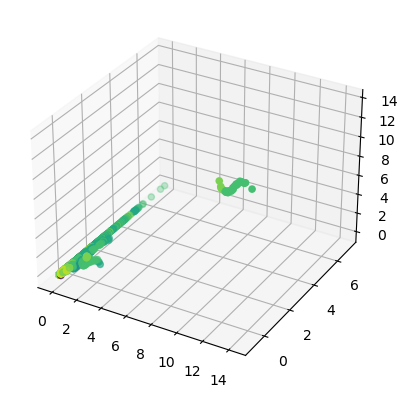

--------TESTING DATA-------


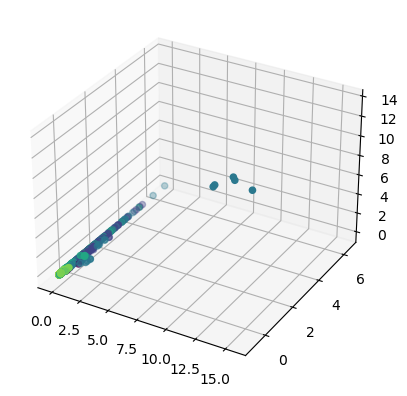

In [48]:
# INSERT CODE TO TRAIN THE MODEL 		
model = GaussianNB().fit(x_train, y_train)
yp_test = model.predict(x_test)
print("ACCURACY CALCULATION")
print("TEST SET:")
print("Accuracy:",(1-np.count_nonzero(y_test - yp_test)/len(y_test))*100)

print("--------TRAINING DATA-------")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2],  x_train[:,3],marker='o',c=y_train)
plt.savefig('../../501-project-website/images/naive_bayes_python_train.png')
plt.show()

print("--------TESTING DATA-------")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:,0], x_test[:,1], x_test[:,2],  x_test[:,3],marker='o',c=y_test)
plt.savefig('../../501-project-website/images/naive_bayes_python_test.png')
plt.show()

